# Credit default prediction 

In [37]:
# Importing libraries
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
import itertools

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,mean_absolute_error, mean_squared_error, classification_report, roc_curve, auc
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from pathlib import Path
import matplotlib.pyplot as plt

import math 
from datetime import date, timedelta
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the data
csv_path1 = Path('Data/cs-training.csv')
credit_train_df=pd.read_csv(csv_path1, index_col=False,header=0).drop(['Unnamed: 0'], axis=1)
credit_train_df.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [4]:
credit_train_df.shape

(150000, 11)

In [5]:
# Reading the data
csv_path2 = Path('Data/cs-test.csv')
credit_test_df=pd.read_csv(csv_path2, index_col=False,header=0).drop(['Unnamed: 0'], axis=1)
credit_test_df.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0


In [6]:
# Checking for null
credit_train_df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [7]:
# Imputing NAN, NA, NULL values
values = {'MonthlyIncome':credit_train_df['MonthlyIncome'].mean(),'NumberOfDependents':credit_train_df['NumberOfDependents'].mean()}
credit_train_df1 = credit_train_df.fillna(value=values)
credit_train_df = credit_train_df1.drop(['NumberOfTime60-89DaysPastDueNotWorse'], axis = 1)

In [8]:
# Rechecking for nulls
credit_train_df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfDependents                      0
dtype: int64

In [9]:
# Imputing NAN, NA, NULL values
values = {'MonthlyIncome':credit_test_df['MonthlyIncome'].mean(),'NumberOfDependents':credit_test_df['NumberOfDependents'].mean()}
credit_test_df1 = credit_test_df.fillna(value=values)
credit_test_df = credit_test_df1.drop(['NumberOfTime60-89DaysPastDueNotWorse'], axis = 1)

In [10]:
# Creating new variable to input features and labels
X = credit_train_df.iloc[:,1:]
y = credit_train_df['SeriousDlqin2yrs']

X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [11]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X, y,
                                test_size=0.2,
                                random_state=42)
display(X_train.head(2))
display(X_test.head(2))

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
104025,0.000000,29,0,0.011513,4342.0,5,0,0,0.0
5415,0.595526,55,0,0.835333,1833.0,11,0,1,0.0


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
59770,0.02969,57,0,0.283244,10121.0,7,0,1,0.0
21362,0.00000,57,0,0.142562,7750.0,9,0,1,0.0


In [12]:
# Applying SMOTE for the data imbalance
imb = SMOTE(random_state=42, sampling_strategy=1.0)
X_train_imb, y_train_imb = imb.fit_sample(X_train,y_train)

In [13]:
X_train_imb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223860 entries, 0 to 223859
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  223860 non-null  float64
 1   age                                   223860 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  223860 non-null  int64  
 3   DebtRatio                             223860 non-null  float64
 4   MonthlyIncome                         223860 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       223860 non-null  int64  
 6   NumberOfTimes90DaysLate               223860 non-null  int64  
 7   NumberRealEstateLoansOrLines          223860 non-null  int64  
 8   NumberOfDependents                    223860 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 15.4 MB


In [14]:
X_train_imb.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
count,223860.000000,223860.000000,223860.000000,223860.000000,2.238600e+05,223860.000000,223860.000000,223860.000000,223860.000000
mean,4.669386,48.986183,1.112173,322.605201,6.256522e+03,7.920370,0.922867,0.867390,0.843066
std,192.386109,13.922912,8.105577,1637.016401,1.061940e+04,5.052418,8.110366,1.106204,1.064294
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.099558,39.000000,0.000000,0.203679,3.500000e+03,4.000000,0.000000,0.000000,0.000000
50%,0.470476,48.000000,0.000000,0.398980,6.000000e+03,7.000000,0.000000,1.000000,0.381802
75%,0.882555,58.000000,1.000000,0.836056,6.881213e+03,11.000000,0.000000,1.000000,1.412009
max,50708.000000,109.000000,98.000000,326442.000000,3.008750e+06,58.000000,98.000000,54.000000,13.000000


<AxesSubplot:title={'center':'Credit_Train_Coorrelation'}>

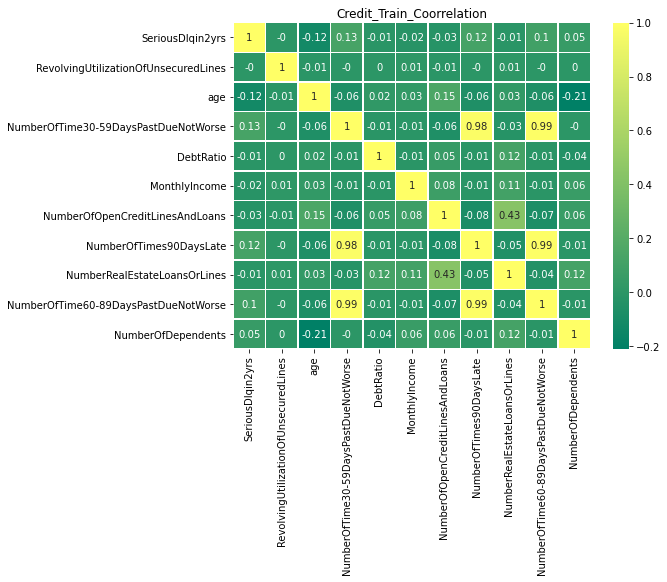

In [15]:
# Correlation before removing highly correlated column
plt.figure(figsize=[8,6])
plt.title("Credit_Train_Coorrelation")
sns.heatmap(credit_train_df1.corr().round(2), linewidths=.5, annot=True,cmap="summer")

<AxesSubplot:title={'center':'Credit_Train_Coorrelation'}>

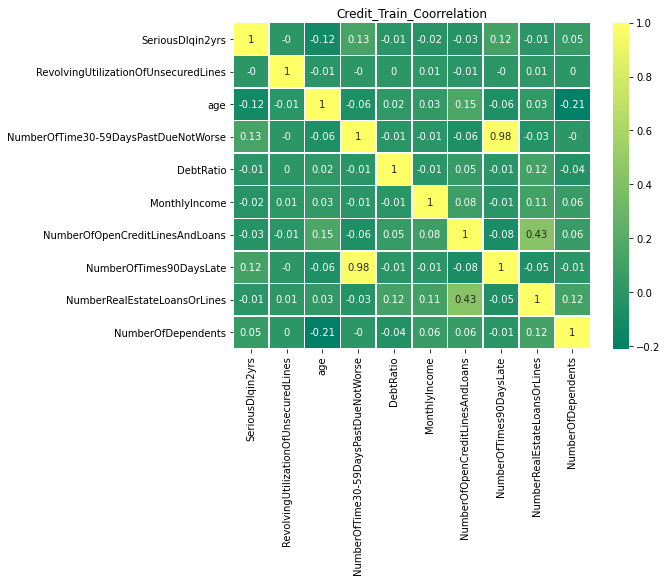

In [16]:
# Correlation after removing highly correlated column
plt.figure(figsize=[8,6])
plt.title("Credit_Train_Coorrelation")
sns.heatmap(credit_train_df.corr().round(2), linewidths=.5, annot=True,cmap="summer")

In [17]:
# Checking for multicollinearity in the data set
# VIF above 4 indicates that multicollinearity might exist. When VIF is higher than 10, there is significant multicollinearity in the data set.
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.sort_values(by=["VIF Factor"], ascending=False)

,Features,VIF Factor
2,NumberOfTime30-59DaysPastDueNotWorse,31.646901
6,NumberOfTimes90DaysLate,31.563437
5,NumberOfOpenCreditLinesAndLoans,4.558879
1,age,3.661696
7,NumberRealEstateLoansOrLines,2.302657
8,NumberOfDependents,1.417769
4,MonthlyIncome,1.287480
3,DebtRatio,1.048235
0,RevolvingUtilizationOfUnsecuredLines,1.000780


In [18]:
# Detect the highly correlated column pairs for future use/masking
mask_up = np.triu(np.ones(credit_train_df.corr().shape)).astype(bool)

# Find the highly correlated pairs
correlated_pairs = credit_train_df.corr().mask(mask_up).abs().unstack().sort_values(ascending=False)
correlated_pairs = pd.DataFrame(correlated_pairs)
highly_correlated = correlated_pairs[correlated_pairs[0]>0.75]
display("Highly Correlated Features", highly_correlated)

'Highly Correlated Features'

,,0
NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,0.983603


# Models

## Parameter tuning using grid search cross validation

GridSearchCV is a method to search the candidate best parameters exhaustively from the grid of given parameters. 
Target estimator (model) and parameters for search need to be provided for this cross-validation search method. 
GridSearchCV is useful when we are looking for the best parameter for the target model and dataset, multiple parameters are tested by cross-validation and the best parameters can be extracted to apply for a predictive model.
Exhaustive search over specified parameter values for an estimator.
Important members are fit, predict.
GridSearchCV implements a “fit” and a “score” method. 
It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

In [17]:
# Multi-layer Perceptron classifier grid search 
parameters = {'hidden_layer_sizes':[(50,),(100,),(200,)], 'learning_rate':['constant', 'adaptive'], 'early_stopping':[True, False]}
model = MLPClassifier(random_state=42)

mlp_grid = GridSearchCV(model, parameters, scoring="f1")
mlp_grid.fit(X_train_imb, y_train_imb)
df = pd.DataFrame(mlp_grid.cv_results_)
df.to_csv("Data/mlp_grid_search.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_early_stopping,param_hidden_layer_sizes,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,41.351240,25.146245,0.080720,0.013614,True,"(50,)",constant,"{'early_stopping': True, 'hidden_layer_sizes':...",0.696721,0.780810,0.694338,0.768610,0.686130,0.725322,0.040662,7
1,44.627879,27.553453,0.091364,0.013491,True,"(50,)",adaptive,"{'early_stopping': True, 'hidden_layer_sizes':...",0.696721,0.780810,0.694338,0.768610,0.686130,0.725322,0.040662,7
2,48.265039,10.342024,0.163165,0.018602,True,"(100,)",constant,"{'early_stopping': True, 'hidden_layer_sizes':...",0.764867,0.709826,0.700410,0.743640,0.760444,0.735837,0.026233,5
3,48.648796,10.291897,0.158377,0.007553,True,"(100,)",adaptive,"{'early_stopping': True, 'hidden_layer_sizes':...",0.764867,0.709826,0.700410,0.743640,0.760444,0.735837,0.026233,5
4,102.751760,19.326208,0.311167,0.037066,True,"(200,)",constant,"{'early_stopping': True, 'hidden_layer_sizes':...",0.758538,0.774592,0.760362,0.731814,0.771503,0.759362,0.015099,3
5,99.922283,20.806755,0.305382,0.039650,True,"(200,)",adaptive,"{'early_stopping': True, 'hidden_layer_sizes':...",0.758538,0.774592,0.760362,0.731814,0.771503,0.759362,0.015099,3
6,49.343714,16.567894,0.081781,0.008648,False,"(50,)",constant,"{'early_stopping': False, 'hidden_layer_sizes'...",0.780610,0.753609,0.755487,0.726961,0.251830,0.653699,0.201651,11
7,51.877394,17.740427,0.084977,0.002478,False,"(50,)",adaptive,"{'early_stopping': False, 'hidden_layer_sizes'...",0.780610,0.753609,0.755487,0.726961,0.251830,0.653699,0.201651,11
8,68.353569,23.763673,0.195956,0.034559,False,"(100,)",constant,"{'early_stopping': False, 'hidden_layer_sizes'...",0.776717,0.666230,0.415786,0.762072,0.734367,0.671034,0.133148,9
9,67.595684,23.246036,0.191490,0.031315,False,"(100,)",adaptive,"{'early_stopping': False, 'hidden_layer_sizes'...",0.776717,0.666230,0.415786,0.762072,0.734367,0.671034,0.133148,9


In [60]:
# Random Forest grid search 
parameters = {'max_depth':[None, 10, 7, 5], 'min_samples_split':[2, 3, 4]}
model = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(model, parameters, scoring="f1")
rf_grid.fit(X_train_imb, y_train_imb)
rf_df = pd.DataFrame(rf_grid.cv_results_)
rf_df.to_csv("Data/rf_grid_search.csv")
rf_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,50.813416,1.812298,1.579382,0.064253,None,2,"{'max_depth': None, 'min_samples_split': 2}",0.849678,0.925820,0.925288,0.925007,0.925019,0.910162,0.030243,1
1,49.936528,2.396299,1.515923,0.050708,None,3,"{'max_depth': None, 'min_samples_split': 3}",0.849083,0.926607,0.923738,0.924540,0.922774,0.909349,0.030159,2
2,48.890033,0.854209,1.586317,0.330782,None,4,"{'max_depth': None, 'min_samples_split': 4}",0.847295,0.923899,0.923173,0.922767,0.922060,0.907839,0.030278,3
3,33.156474,1.444729,0.685102,0.020396,10,2,"{'max_depth': 10, 'min_samples_split': 2}",0.810254,0.849901,0.847675,0.845907,0.845990,0.839945,0.014917,5
4,30.433792,0.985866,0.659442,0.026405,10,3,"{'max_depth': 10, 'min_samples_split': 3}",0.807548,0.849541,0.846075,0.848140,0.846609,0.839583,0.016063,6
5,29.742976,0.384717,0.685927,0.036491,10,4,"{'max_depth': 10, 'min_samples_split': 4}",0.809390,0.851597,0.848942,0.845849,0.844390,0.840034,0.015523,4
6,23.951327,0.414724,0.501606,0.015361,7,2,"{'max_depth': 7, 'min_samples_split': 2}",0.798733,0.826385,0.821002,0.820841,0.821317,0.817656,0.009685,7
7,23.823344,0.193410,0.506728,0.016611,7,3,"{'max_depth': 7, 'min_samples_split': 3}",0.798679,0.825955,0.821338,0.820575,0.820982,0.817506,0.009613,9
8,23.847224,0.232522,0.509355,0.028889,7,4,"{'max_depth': 7, 'min_samples_split': 4}",0.798429,0.826093,0.821986,0.820466,0.820900,0.817575,0.009777,8
9,18.344562,0.160103,0.393020,0.014419,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.785370,0.806976,0.802836,0.801953,0.802520,0.799931,0.007495,10


In [19]:
# AdaBoost classifier using grid search
# The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.

parameters = {'algorithm':['SAMME', 'SAMME.R']}
model = AdaBoostClassifier(random_state=42)

adb_grid = GridSearchCV(model, parameters, scoring="f1")
adb_grid.fit(X_train_imb, y_train_imb)
adb_grid = pd.DataFrame(adb_grid.cv_results_)
adb_grid.to_csv("Data/adb_grid_search.csv")
adb_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.851979,0.129869,0.154553,0.005735,SAMME,{'algorithm': 'SAMME'},0.794016,0.840442,0.838725,0.833732,0.831011,0.827585,0.017122,2
1,7.720869,0.086927,0.285647,0.022926,SAMME.R,{'algorithm': 'SAMME.R'},0.794093,0.856023,0.852509,0.853692,0.854877,0.842239,0.024102,1


In [20]:
# K-nearest neighbors using grid search GridSearch
parameters = {'n_neighbors':[3, 5, 10, 15]}
model = KNeighborsClassifier()

knn_grid = GridSearchCV(model, parameters, scoring="f1")
knn_grid.fit(X_train_imb, y_train_imb)
knn_grid = pd.DataFrame(knn_grid.cv_results_)
knn_grid.to_csv("Data/knn_grid_search.csv")
knn_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.029597,0.036672,5.511809,0.161504,3,{'n_neighbors': 3},0.874027,0.865086,0.866973,0.866438,0.864682,0.867441,0.003399,1
1,1.047304,0.060468,5.875414,0.164231,5,{'n_neighbors': 5},0.859744,0.852746,0.854953,0.853456,0.851571,0.854494,0.002844,2
2,1.009259,0.013924,6.295640,0.146105,10,{'n_neighbors': 10},0.837370,0.834309,0.835829,0.833878,0.834463,0.835170,0.001279,3
3,1.005327,0.019056,6.629087,0.160561,15,{'n_neighbors': 15},0.813201,0.813909,0.815948,0.812828,0.814629,0.814103,0.001110,4


In [21]:
# Decision tree classifer using GridSearch
parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_depth':[None, 10, 7, 5], 'min_samples_split':[2, 3, 4]}
model = DecisionTreeClassifier(random_state=42)

dtc_grid = GridSearchCV(model, parameters, scoring="f1")
dtc_grid.fit(X_train_imb, y_train_imb)
dtc_grid = pd.DataFrame(dtc_grid.cv_results_)
dtc_grid.to_csv("Data/dtc_grid_search.csv")
dtc_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.169453,0.038248,0.023476,0.000462,gini,None,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.810464,0.894226,0.889274,0.893053,0.889821,0.875368,0.032506,3
1,0.369469,0.016347,0.026743,0.000513,gini,None,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.803060,0.879682,0.870870,0.885081,0.882593,0.864257,0.030973,8
2,1.180464,0.076450,0.023976,0.001585,gini,None,3,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.806410,0.893809,0.890127,0.893300,0.890189,0.874767,0.034212,4
3,0.404728,0.024413,0.028424,0.002338,gini,None,3,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.801669,0.880680,0.865660,0.873483,0.875787,0.859456,0.029297,12
4,1.147186,0.055108,0.023927,0.000784,gini,None,4,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.804615,0.893481,0.888986,0.891347,0.888923,0.873470,0.034469,6


In [22]:
# SGD Classifier using grid search
parameters = {'penalty':['l2','l1','elasticnet'], 'learning_rate':['constant','optimal','invscaling','adaptive'], 'eta0':[0.001, 0.05, 0.01, 0.1, 0.5, 1]}
model = SGDClassifier(random_state=42)

sgd_grid = GridSearchCV(model, parameters, scoring="f1")
sgd_grid.fit(X_train_imb, y_train_imb)
sgd_grid = pd.DataFrame(sgd_grid.cv_results_)
sgd_grid.to_csv("Data/sgd_grid_search.csv")
sgd_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.385163,0.075574,0.018661,0.003699,0.001,constant,l2,"{'eta0': 0.001, 'learning_rate': 'constant', '...",0.663064,0.043198,0.112167,0.037721,0.143111,0.199852,0.235075,68
1,0.441564,0.188484,0.015310,0.000811,0.001,constant,l1,"{'eta0': 0.001, 'learning_rate': 'constant', '...",0.667125,0.294360,0.648906,0.137997,0.086044,0.366886,0.247468,43
2,0.396636,0.053126,0.016562,0.001266,0.001,constant,elasticnet,"{'eta0': 0.001, 'learning_rate': 'constant', '...",0.666797,0.053256,0.658697,0.122065,0.260365,0.352236,0.262174,44
3,0.640770,0.056047,0.015332,0.001416,0.001,optimal,l2,"{'eta0': 0.001, 'learning_rate': 'optimal', 'p...",0.695573,0.666716,0.039185,0.038222,0.086914,0.305322,0.307498,56
4,0.867291,0.070448,0.016131,0.002069,0.001,optimal,l1,"{'eta0': 0.001, 'learning_rate': 'optimal', 'p...",0.699218,0.667294,0.442201,0.668312,0.386546,0.572714,0.130981,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.858935,0.121769,0.014919,0.002261,1,invscaling,l1,"{'eta0': 1, 'learning_rate': 'invscaling', 'pe...",0.086320,0.666607,0.043325,0.183859,0.685549,0.333132,0.283757,52
68,0.763243,0.146782,0.014088,0.002029,1,invscaling,elasticnet,"{'eta0': 1, 'learning_rate': 'invscaling', 'pe...",0.683655,0.666667,0.042768,0.041338,0.128523,0.312590,0.297766,55
69,3.207302,0.293665,0.018344,0.002079,1,adaptive,l2,"{'eta0': 1, 'learning_rate': 'adaptive', 'pena...",0.653354,0.656350,0.658679,0.651975,0.660089,0.656089,0.003072,18
70,3.835553,0.430241,0.017563,0.001052,1,adaptive,l1,"{'eta0': 1, 'learning_rate': 'adaptive', 'pena...",0.704327,0.689362,0.685600,0.683753,0.689960,0.690600,0.007242,9


In [23]:
# Logistic Regression using grid search
parameters = {'penalty':['l2','l1','elasticnet'], 'C':[1, 10, 50, 100, 200, 500], 'solver':['newton-cg','lbfgs','liblinear','sag','saga']}
model = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(model, parameters, scoring="f1")
lr_grid.fit(X_train_imb, y_train_imb)
lr_grid = pd.DataFrame(lr_grid.cv_results_)
lr_grid.to_csv("Data/lr_grid_search.csv")
lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.797672,1.197876,0.017582,0.002532,1,l2,newton-cg,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",0.651882,0.659040,0.657282,0.660321,0.662775,0.658260,0.003657,7
1,1.674034,0.087310,0.015502,0.001039,1,l2,lbfgs,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.630343,0.587641,0.579349,0.589576,0.585592,0.594500,0.018248,22
2,1.737128,0.417735,0.016376,0.000912,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.651127,0.658766,0.657265,0.660074,0.662364,0.657919,0.003786,14
3,8.302814,0.069850,0.015729,0.002274,1,l2,sag,"{'C': 1, 'penalty': 'l2', 'solver': 'sag'}",0.000357,0.000089,0.000089,0.000357,0.000089,0.000197,0.000131,25
4,8.655612,0.067611,0.014469,0.000490,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.000357,0.000089,0.000000,0.000357,0.000089,0.000179,0.000149,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.016116,0.003054,0.000000,0.000000,500,elasticnet,newton-cg,"{'C': 500, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
86,0.014531,0.000506,0.000000,0.000000,500,elasticnet,lbfgs,"{'C': 500, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
87,0.014542,0.000494,0.000000,0.000000,500,elasticnet,liblinear,"{'C': 500, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
88,0.014212,0.000076,0.000000,0.000000,500,elasticnet,sag,"{'C': 500, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,84


In [18]:
# MLP with Standard Scaling using grid search CV
parameters = {'mlp__hidden_layer_sizes':[(50,),(100,),(200,)], 'mlp__learning_rate':['constant', 'adaptive'], 'mlp__early_stopping':[True, False]}
model = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(max_iter=1000, random_state=42))])

mlpsc_grid = GridSearchCV(model, parameters, scoring="f1")
mlpsc_grid.fit(X_train_imb, y_train_imb)
mlpsc_grid = pd.DataFrame(mlpsc_grid.cv_results_)
mlpsc_grid.to_csv("Data/mlpstsc_grid_search.csv")
mlpsc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp__early_stopping,param_mlp__hidden_layer_sizes,param_mlp__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,75.336515,12.826442,0.072676,0.008453,True,"(50,)",constant,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.795331,0.831478,0.825983,0.829202,0.822184,0.820836,0.013131,11
1,70.765873,10.958602,0.073838,0.014958,True,"(50,)",adaptive,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.795331,0.831478,0.825983,0.829202,0.822184,0.820836,0.013131,11
2,98.641937,14.445646,0.132928,0.012101,True,"(100,)",constant,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.799845,0.829720,0.829127,0.830093,0.825950,0.822947,0.011644,9
3,99.641047,16.087013,0.127269,0.012022,True,"(100,)",adaptive,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.799845,0.829720,0.829127,0.830093,0.825950,0.822947,0.011644,9
4,143.688496,44.365635,0.261006,0.046180,True,"(200,)",constant,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.790587,0.840308,0.825222,0.834312,0.834989,0.825084,0.017917,5
5,141.556541,42.871056,0.260440,0.042766,True,"(200,)",adaptive,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.790587,0.840308,0.825222,0.834312,0.834989,0.825084,0.017917,5
6,214.917094,54.162575,0.065599,0.006243,False,"(50,)",constant,"{'mlp__early_stopping': False, 'mlp__hidden_la...",0.783459,0.835851,0.832460,0.830687,0.837052,0.823902,0.020350,7
7,214.969250,54.508464,0.075397,0.006485,False,"(50,)",adaptive,"{'mlp__early_stopping': False, 'mlp__hidden_la...",0.783459,0.835851,0.832460,0.830687,0.837052,0.823902,0.020350,7
8,433.586716,46.907749,0.160849,0.015296,False,"(100,)",constant,"{'mlp__early_stopping': False, 'mlp__hidden_la...",0.801245,0.846931,0.839677,0.840429,0.841222,0.833901,0.016527,1
9,432.208527,44.617237,0.164204,0.020723,False,"(100,)",adaptive,"{'mlp__early_stopping': False, 'mlp__hidden_la...",0.801245,0.846931,0.839677,0.840429,0.841222,0.833901,0.016527,1


### Review of the cross validation --

In [30]:
# Identifying models with high scoring
import os

files = os.listdir(r"C:/Users/Endalkachew Desta/project_2/Data/Data/")
for file in files:
    df = pd.read_csv("Data/Data/"+file, index_col=0).sort_values(by=["rank_test_score"])
    print(file.split(".")[0], *df[df["rank_test_score"]==1]["params"], "\n")

adb_grid_search {'algorithm': 'SAMME.R'} 

dtc_grid_search {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'} 

knn_grid_search {'n_neighbors': 3} 

lr_grid_search {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'} 

mlpstsc_grid_search {'mlp__early_stopping': False, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant'} {'mlp__early_stopping': False, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'adaptive'} 

mlp_grid_search {'early_stopping': False, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant'} {'early_stopping': False, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive'} 

rf_grid_search {'max_depth': None, 'min_samples_split': 2} 

sgd_grid_search {'eta0': 0.05, 'learning_rate': 'adaptive', 'penalty': 'elasticnet'} 



In [180]:
# Collecting the scores 
models = []
mean_score = []
std_score = []
for file in files:
    model_score = pd.read_csv("Data/Data/"+file, index_col=0)
    models.append(file.split("_grid_search.csv")[0])
    mean_score.append(model_score[model_score["rank_test_score"]==1]["mean_test_score"].unique()[0])
    std_score.append(model_score[model_score["rank_test_score"]==1]["std_test_score"].unique()[0])
    
df_score = pd.DataFrame()
df_score["Models"] = models
df_score['mean_score'] = mean_score
df_score['std_score'] = std_score
df_score

,Models,mean_score,std_score
0,adb,0.842239,0.024102
1,dtc,0.876193,0.033971
2,knn,0.867441,0.003399
3,lr,0.658284,0.003660
4,mlpstsc,0.833901,0.016527
5,mlp,0.775540,0.007105
6,rf,0.911112,0.028945
7,sgd,0.697804,0.009304


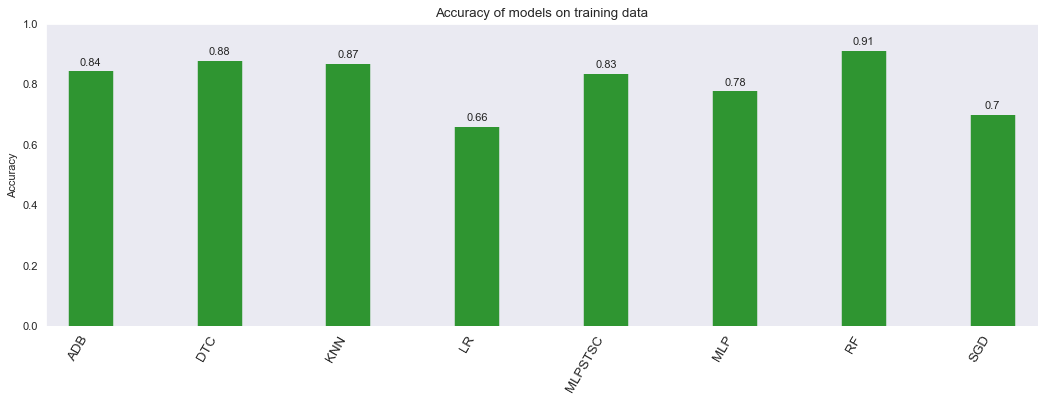

In [182]:
# df_score bar plot
fig, ax = plt.subplots(figsize=(16,5), facecolor='white', dpi= 80)
ax.vlines(x=df.Models, ymin=0, ymax=df.mean_score, color='g', alpha=0.8, linewidth=40)

# Annotate Text
for i, score in enumerate(df.mean_score):
    ax.text(i, score+0.02, round(score, 2), horizontalalignment='center')
    
ax.set_title('Accuracy of models on training data', fontdict={'size':12})
ax.set(ylabel='Accuracy', ylim=(0, 1))
plt.xticks(df_score.index, df.Models.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)
plt.grid()

## Validation 

[[25925  2119]
 [ 1111   845]] 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     28044
           1       0.29      0.43      0.34      1956

    accuracy                           0.89     30000
   macro avg       0.62      0.68      0.64     30000
weighted avg       0.91      0.89      0.90     30000



Text(0.5, 1.0, 'Random Forest Classifier ROC Curves')

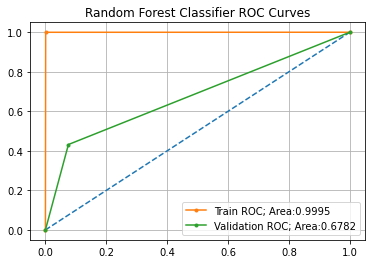

In [22]:
# Random Forest Classifier
rf = RandomForestClassifier(max_depth=None, min_samples_split=2, random_state=42)
rf.fit(X_train_imb, y_train_imb)
rf_pred = rf.predict(X_train_imb)
rf_val_pred = rf.predict(X_test)

print(confusion_matrix(Y_test,rf_val_pred),'\n')
print(classification_report(Y_test,rf_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, rf_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, rf_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("Random Forest Classifier ROC Curves")

[[24393  3651]
 [ 1219   737]] 

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     28044
           1       0.17      0.38      0.23      1956

    accuracy                           0.84     30000
   macro avg       0.56      0.62      0.57     30000
weighted avg       0.90      0.84      0.87     30000



Text(0.5, 1.0, 'Decision Tree Classifier ROC Curves')

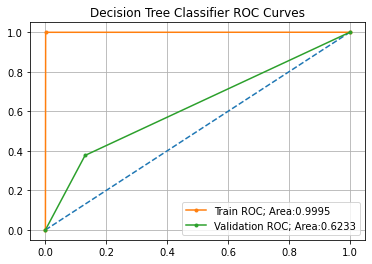

In [23]:
# Decision Tree classifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, splitter='best', random_state=42)
dtc.fit(X_train_imb, y_train_imb)
dtc_pred = dtc.predict(X_train_imb)
dtc_val_pred = dtc.predict(X_test)

print(confusion_matrix(Y_test,dtc_val_pred),'\n')
print(classification_report(Y_test,dtc_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, dtc_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, dtc_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("Decision Tree Classifier ROC Curves")

[[22140  5904]
 [ 1275   681]] 

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     28044
           1       0.10      0.35      0.16      1956

    accuracy                           0.76     30000
   macro avg       0.52      0.57      0.51     30000
weighted avg       0.89      0.76      0.81     30000



Text(0.5, 1.0, 'KNN Classifier ROC Curves')

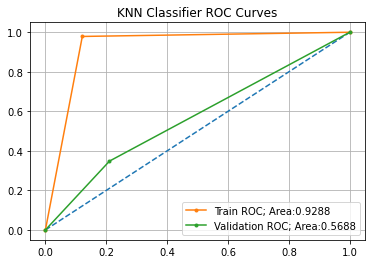

In [24]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_imb, y_train_imb)
knn_pred = knn.predict(X_train_imb)
knn_val_pred = knn.predict(X_test)

print(confusion_matrix(Y_test,knn_val_pred),'\n')
print(classification_report(Y_test,knn_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, knn_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, knn_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("KNN Classifier ROC Curves")

[[23254  4790]
 [ 1130   826]] 

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     28044
           1       0.15      0.42      0.22      1956

    accuracy                           0.80     30000
   macro avg       0.55      0.63      0.55     30000
weighted avg       0.90      0.80      0.84     30000



Text(0.5, 1.0, 'KNN Standardized Classifier ROC Curves')

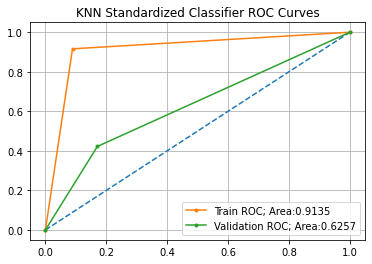

In [25]:
# KNN - Standard scale
knn_ss = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
knn_ss.fit(X_train_imb, y_train_imb)
knn_ss_pred = knn_ss.predict(X_train_imb)
knn_ss_val_pred = knn_ss.predict(X_test)

print(confusion_matrix(Y_test,knn_ss_val_pred),'\n')
print(classification_report(Y_test,knn_ss_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, knn_ss_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, knn_ss_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("KNN Standardized Classifier ROC Curves")

[[23894  4150]
 [  712  1244]] 

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     28044
           1       0.23      0.64      0.34      1956

    accuracy                           0.84     30000
   macro avg       0.60      0.74      0.62     30000
weighted avg       0.92      0.84      0.87     30000



Text(0.5, 1.0, 'MLP Standardized Classifier ROC Curves')

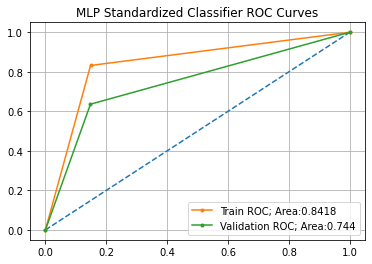

In [26]:
# MLP - Standard scale
mlp_ss = make_pipeline(StandardScaler(), MLPClassifier(early_stopping=False, hidden_layer_sizes=(100,), learning_rate='adaptive', max_iter=1000, random_state=42))
mlp_ss.fit(X_train_imb, y_train_imb)
mlp_ss_pred = mlp_ss.predict(X_train_imb)
mlp_ss_val_pred = mlp_ss.predict(X_test)

print(confusion_matrix(Y_test,mlp_ss_val_pred),'\n')
print(classification_report(Y_test,mlp_ss_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, mlp_ss_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, mlp_ss_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("MLP Standardized Classifier ROC Curves")

## Ensemble classifiers

[[25227  2817]
 [ 1242   714]] 

              precision    recall  f1-score   support

           0       0.95      0.90      0.93     28044
           1       0.20      0.37      0.26      1956

    accuracy                           0.86     30000
   macro avg       0.58      0.63      0.59     30000
weighted avg       0.90      0.86      0.88     30000



Text(0.5, 1.0, 'Stacking Ensemble Classifier ROC Curves')

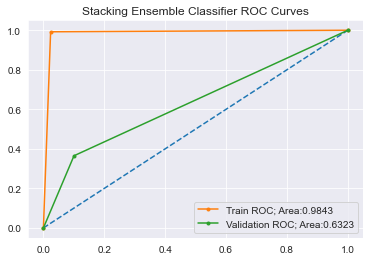

In [183]:
# Stacking classifier
estimators = [('rf', rf), ('dtc', dtc),('knn_ss', knn_ss),('mlp_ss', mlp_ss)]
stack = StackingClassifier(estimators=estimators, final_estimator=rf)
stack.fit(X_train_imb, y_train_imb)

stack_pred = stack.predict(X_train_imb)
stack_val_pred = stack.predict(X_test)

print(confusion_matrix(Y_test,stack_val_pred),'\n')
print(classification_report(Y_test,stack_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, stack_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, stack_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')

plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("Stacking Ensemble Classifier ROC Curves")

[[25607  2437]
 [ 1114   842]] 

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     28044
           1       0.26      0.43      0.32      1956

    accuracy                           0.88     30000
   macro avg       0.61      0.67      0.63     30000
weighted avg       0.91      0.88      0.90     30000



Text(0.5, 1.0, 'Voting soft Ensemble Classifier ROC Curves')

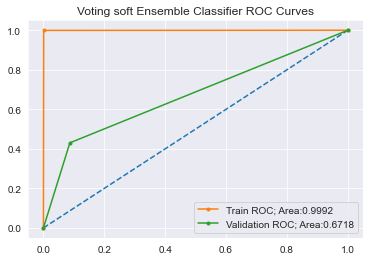

In [184]:
# Voting soft classifier
estimators = [('rf', rf), ('dtc', dtc),('knn_ss', knn_ss),('mlp_ss', mlp_ss)]
voting = VotingClassifier(estimators=estimators, voting='soft')
voting.fit(X_train_imb, y_train_imb)
vs_pred = voting.predict(X_train_imb)
vs_val_pred = voting.predict(X_test)

print(confusion_matrix(Y_test,vs_val_pred),'\n')
print(classification_report(Y_test,vs_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, vs_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, vs_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("Voting soft Ensemble Classifier ROC Curves")

[[26393  1651]
 [ 1214   742]] 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     28044
           1       0.31      0.38      0.34      1956

    accuracy                           0.90     30000
   macro avg       0.63      0.66      0.64     30000
weighted avg       0.91      0.90      0.91     30000



Text(0.5, 1.0, 'Voting hard Ensemble Classifier ROC Curves')

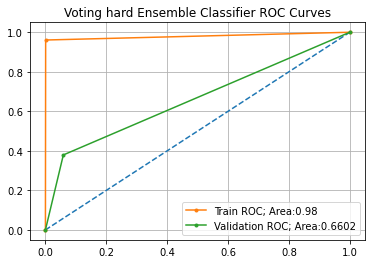

In [29]:
# Voting hard classifier
estimators = [('rf', rf), ('dtc', dtc),('knn_ss', knn_ss),('mlp_ss', mlp_ss)]
votingH = VotingClassifier(estimators=estimators, voting='hard')
votingH.fit(X_train_imb, y_train_imb)
vh_pred = votingH.predict(X_train_imb)
vh_val_pred = votingH.predict(X_test)

print(confusion_matrix(Y_test,vh_val_pred),'\n')
print(classification_report(Y_test,vh_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, vh_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, vh_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("Voting hard Ensemble Classifier ROC Curves")

## Selected model

In [31]:
# Save to file in the current working directory
import pickle
pkl_filename = 'final_model.sav'
pickle.dump(votingH, open(pkl_filename, 'wb'))

In [36]:
# load the model from disk
model = pickle.load(open("final_model.sav", "rb"))

# Calculate the accuracy score and predict target values
score = model.score(X_test, Y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = model.predict(X_test)
print(Ypredict)

Test score: 90.45 %
[0 0 0 ... 0 0 0]
